# Assumptions of Linear Regression
- **There should be linear relationship between (input) independent variable and (output) dependent variabl**e.
- **The Input features should be independent of each other**.
- The Residuals must follow the normal distribution.
- The Residuals should be distributed with equal variance from any point.
- No Auto correlation between residuals i.e, residuals should be independent of each other(Independent Observations).
- The mean of all residuals should be approximately zero.
## 1. Assumption 1: Linearity
- There should be linear relationship between (input) independent variable and (output) dependent variable.

## How to detect ?
- Pearson’s Correlation.
- Scatter plot.

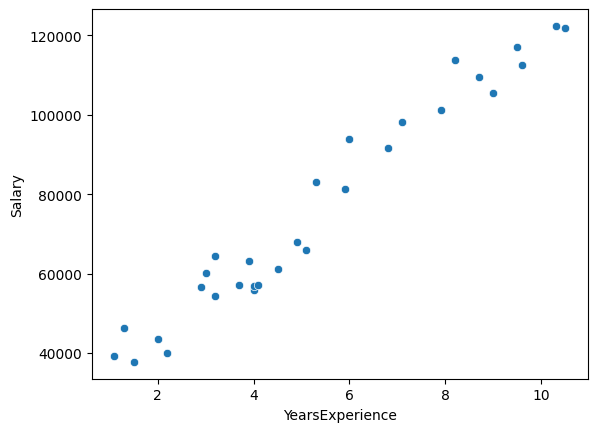

In [9]:
#Importing required libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
df=pd.read_csv(r"C:\Users\RAGHAVENDRA KUMAR\Downloads\Salary Data (1).csv")
# Separate the independent variable (X) and dependent variable (y)
X = df.drop("Salary", axis=1)  # Drop the 'Salary' column to get features
y = df["Salary"]  # Target variable is 'Salary'
sns.scatterplot(x=X["YearsExperience"],y=y)
plt.show()

## 2. Assumption 2 : Independency (No Multicollinearity)
- The Input features should be independent of each other.

## How to detect :
## a. Variance Inflation Factor (VIF):
This is a common technique to quantify how much a variable’s variance is inflated due to multicollinearity with other variables.

- VIF > 10: Indicates high multicollinearity that may require corrective action.
- VIF between 5 and 10: Suggests moderate multicollinearity.
- VIF < 5: Indicates low multicollinearity.

## b. Correlation Matrix:
- This involves calculating the correlation coefficients between pairs of features to identify strong correlations.

## Correlation > 0.8 or < -0.8:
- Indicates strong correlation and potential multicollinearity.

## c. Condition Number:
- This assesses the sensitivity of the solution of a system of linear equations to small changes in the input.

- Condition Number < 10: Indicates low multicollinearity.
- Condition Number between 10 and 30: Suggests moderate multicollinearity.
- Condition Number > 30: Indicates high multicollinearity.
import pandas as pd

Variance Inflation Factor (VIF) Data:
    Feature        VIF
0     const   1.000000
1  Feature1  99.305966
2  Feature2  99.305966

Correlation Matrix:
          Feature1  Feature2
Feature1  1.000000  0.994952
Feature2  0.994952  1.000000

Condition Number: 19.880174384959066


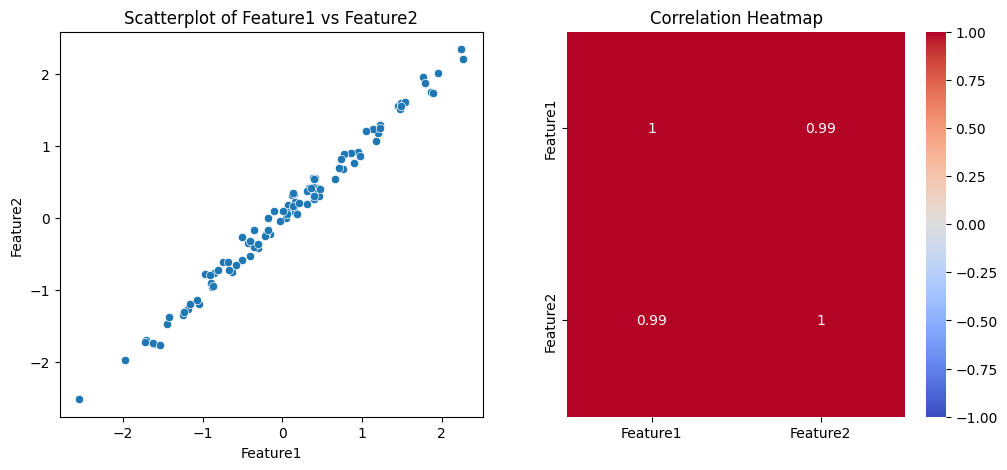

In [10]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from numpy.linalg import cond
import seaborn as sns
import matplotlib.pyplot as plt

# Create a synthetic dataset
np.random.seed(0)
size = 100

# Generate synthetic data
feature1 = np.random.normal(loc=0, scale=1, size=size)
feature2 = feature1 + np.random.normal(loc=0, scale=0.1, size=size)  # feature2 is correlated with feature1
target = 3 * feature1 + 2 * feature2 + np.random.normal(loc=0, scale=1, size=size)

# Create a DataFrame
df = pd.DataFrame({
    'Feature1': feature1,
    'Feature2': feature2,
    'Target': target
})

# Separate the independent variables (X) and the dependent variable (y)
X = df[['Feature1', 'Feature2']]  # Independent features
y = df['Target']  # Dependent variable

# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Fit and transform the features

# Add a constant term to the independent variables for the intercept
X_scaled_with_const = np.c_[np.ones(X_scaled.shape[0]), X_scaled]

# 1. Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = ['const'] + X.columns.tolist()
vif_data["VIF"] = [variance_inflation_factor(X_scaled_with_const, i) for i in range(X_scaled_with_const.shape[1])]

print("Variance Inflation Factor (VIF) Data:")
print(vif_data)

# 2. Correlation Matrix
correlation_matrix = X.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# 3. Condition Number
condition_number = cond(X_scaled)
print(f"\nCondition Number: {condition_number}")

# Plot the features
plt.figure(figsize=(12, 5))

# Scatterplot for Feature1 vs Feature2
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['Feature1'], y=df['Feature2'])
plt.title('Scatterplot of Feature1 vs Feature2')
plt.xlabel('Feature1')
plt.ylabel('Feature2')

# Correlation heatmap
plt.subplot(1, 2, 2)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

## 3. Assumption 3: Normally Distributed (Before building the model)
- The Residuals must follow the normal distribution.

## How to detect ?
- KDE Plot
- Histogram
- QQ Plot
- Shapiro-Wilk test
- Kolmogorov-Smirnov test (K-S test)

In [12]:
import pandas as pd
import statsmodels.api as sm
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler

# Separate the independent variable (X) and dependent variable (y)
X = df.drop("Salary", axis=1)  # Drop the 'Salary' column to get features
y = df["Salary"]  # Target variable is 'Salary'

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Fit and transform the features

# Add a constant term to the independent variables for the intercept
X_scaled_with_const = sm.add_constant(X_scaled)

# Initialize and fit the Linear Regression model
model = sm.OLS(y, X_scaled_with_const).fit()

# Predict the target values
y_pred = model.predict(X_scaled_with_const)

# Calculate residuals
residuals = y - y_pred

# Perform the Shapiro-Wilk test for residuals normality
shapiro_test = shapiro(residuals)
shapiro_stat, shapiro_pvalue = shapiro_test

# Print the Shapiro-Wilk test result
print(f"Shapiro-Wilk Test Statistic: {shapiro_stat}")
print(f"Shapiro-Wilk p-value: {shapiro_pvalue}")

# Interpretation of Shapiro-Wilk test
alpha = 0.05  # Significance level
if shapiro_pvalue < alpha:
    print("Residuals are not normally distributed. Reject the null hypothesis of normality.")
else:
    print("Residuals are normally distributed. Fail to reject")

Shapiro-Wilk Test Statistic: 0.9523392188717111
Shapiro-Wilk p-value: 0.1952218633400768
Residuals are normally distributed. Fail to reject


## 4. Assumption 4: Equal Variance (Homoscedasticity)
- The Residuals should be distributed with equal variance from any point.

## How to detect?
- Breusch-Pagan Test

In [13]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm


# Separate the independent variable (X) and dependent variable (y)
X = df.drop("Salary", axis=1)  # Drop the 'Salary' column to get features
y = df["Salary"]  # Target variable is 'Salary'

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Fit and transform the features

# Add a constant term to the independent variables for the intercept
X_scaled_with_const = sm.add_constant(X_scaled)

# Initialize and fit the Linear Regression model
model = sm.OLS(y, X_scaled_with_const).fit()

# Predict the target values
y_pred = model.predict(X_scaled_with_const)

# Calculate residuals
residuals = y - y_pred

# Perform the Breusch-Pagan test
bp_test = het_breuschpagan(residuals, X_scaled_with_const)

# Extract p-value from the test
bp_pvalue = bp_test[1]

# Print the p-value
print(f"Breusch-Pagan p-value: {bp_pvalue}")

# Interpretation
alpha = 0.05  # Significance level

if bp_pvalue < alpha:
    print("Evidence of heteroscedasticity detected. Reject the null hypothesis of homoscedasticity.")
else:
    print("No evidence of heteroscedasticity detected. Fail to reject the null hypothesis of homoscedasticity.")

Breusch-Pagan p-value: 0.5275785890839375
No evidence of heteroscedasticity detected. Fail to reject the null hypothesis of homoscedasticity.


## 5. Assumption 5: Auto correlation
- No Auto correlation between residuals i.e, residuals should be independent of each other(Independent Observations).

## How to detect ?
- Durbin-Watson Test

- **Null Hypothesis (H0)**: No autocorrelation in the residuals.
- **Alternative Hypothesis (H1)**: Autocorrelation exists.
- The Durbin-Watson statistic ranges between 0 and 4:

- A value around 2 indicates no autocorrelation.
- A value closer to 0 suggests positive autocorrelation.
- A value closer to 4 suggests negative autocorrelation

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.stattools import durbin_watson
import numpy as np


# Separate the independent variable (X) and dependent variable (y)
X = df.drop("Salary", axis=1)  # Drop the 'Salary' column to get features
y = df["Salary"]  # Target variable is 'Salary'

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Fit and transform the features

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_scaled, y)

# Predict the target values
y_pred = model.predict(X_scaled)

# Calculate residuals
residuals = y - y_pred

# Perform the Durbin-Watson test
dw_statistic = durbin_watson(residuals)

# Print the Durbin-Watson statistic
print(f"Durbin-Watson statistic: {dw_statistic}")

# Interpretation
if dw_statistic < 1.5:
    print("There is evidence of positive autocorrelation. Null hypothesis of no autocorrelation may be rejected.")
elif dw_statistic > 2.5:
    print("There is evidence of negative autocorrelation. Null hypothesis of no autocorrelation may be rejected.")
else:
    print("No significant autocorrelation detected. Fail to reject the null hypothesis.")

Durbin-Watson statistic: 1.6479910076183393
No significant autocorrelation detected. Fail to reject the null hypothesis.


## 6. Assumption 6: Residual Mean
- The mean of all residuals should be approximately zero.

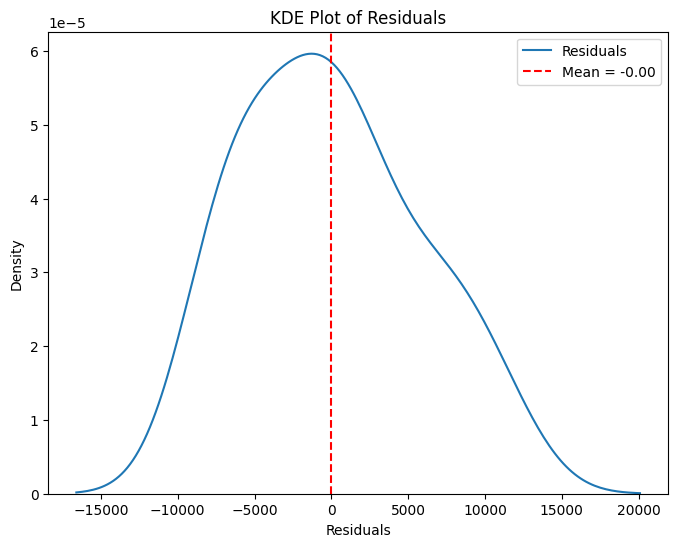

In [15]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


# Separate the independent variable (X) and dependent variable (y)
X = df.drop("Salary", axis=1)  # Drop the 'Salary' column to get features
y = df["Salary"]  # Target variable is 'Salary'

# Scale the features using StandardScaler
st = StandardScaler()
X_scaled = st.fit_transform(X)  # Fit and transform the features to standardize them

# Initialize the Linear Regression model
lr = LinearRegression()

# Fit the model using the scaled features and the target variable
lr.fit(X_scaled, y)
y_pred = lr.predict(X_scaled)
Residuals = y - y_pred

# Calculate the mean of residuals
mean_residuals = Residuals.mean()

# Plot KDE of residuals
plt.figure(figsize=(8, 6))
sns.kdeplot(data=Residuals, label='Residuals')
plt.axvline(x=mean_residuals, color="red", linestyle='--', label=f'Mean = {mean_residuals:.2f}')
plt.legend()
plt.title('KDE Plot of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

## All Linear Regression Assumptions in Single Python Snippet code

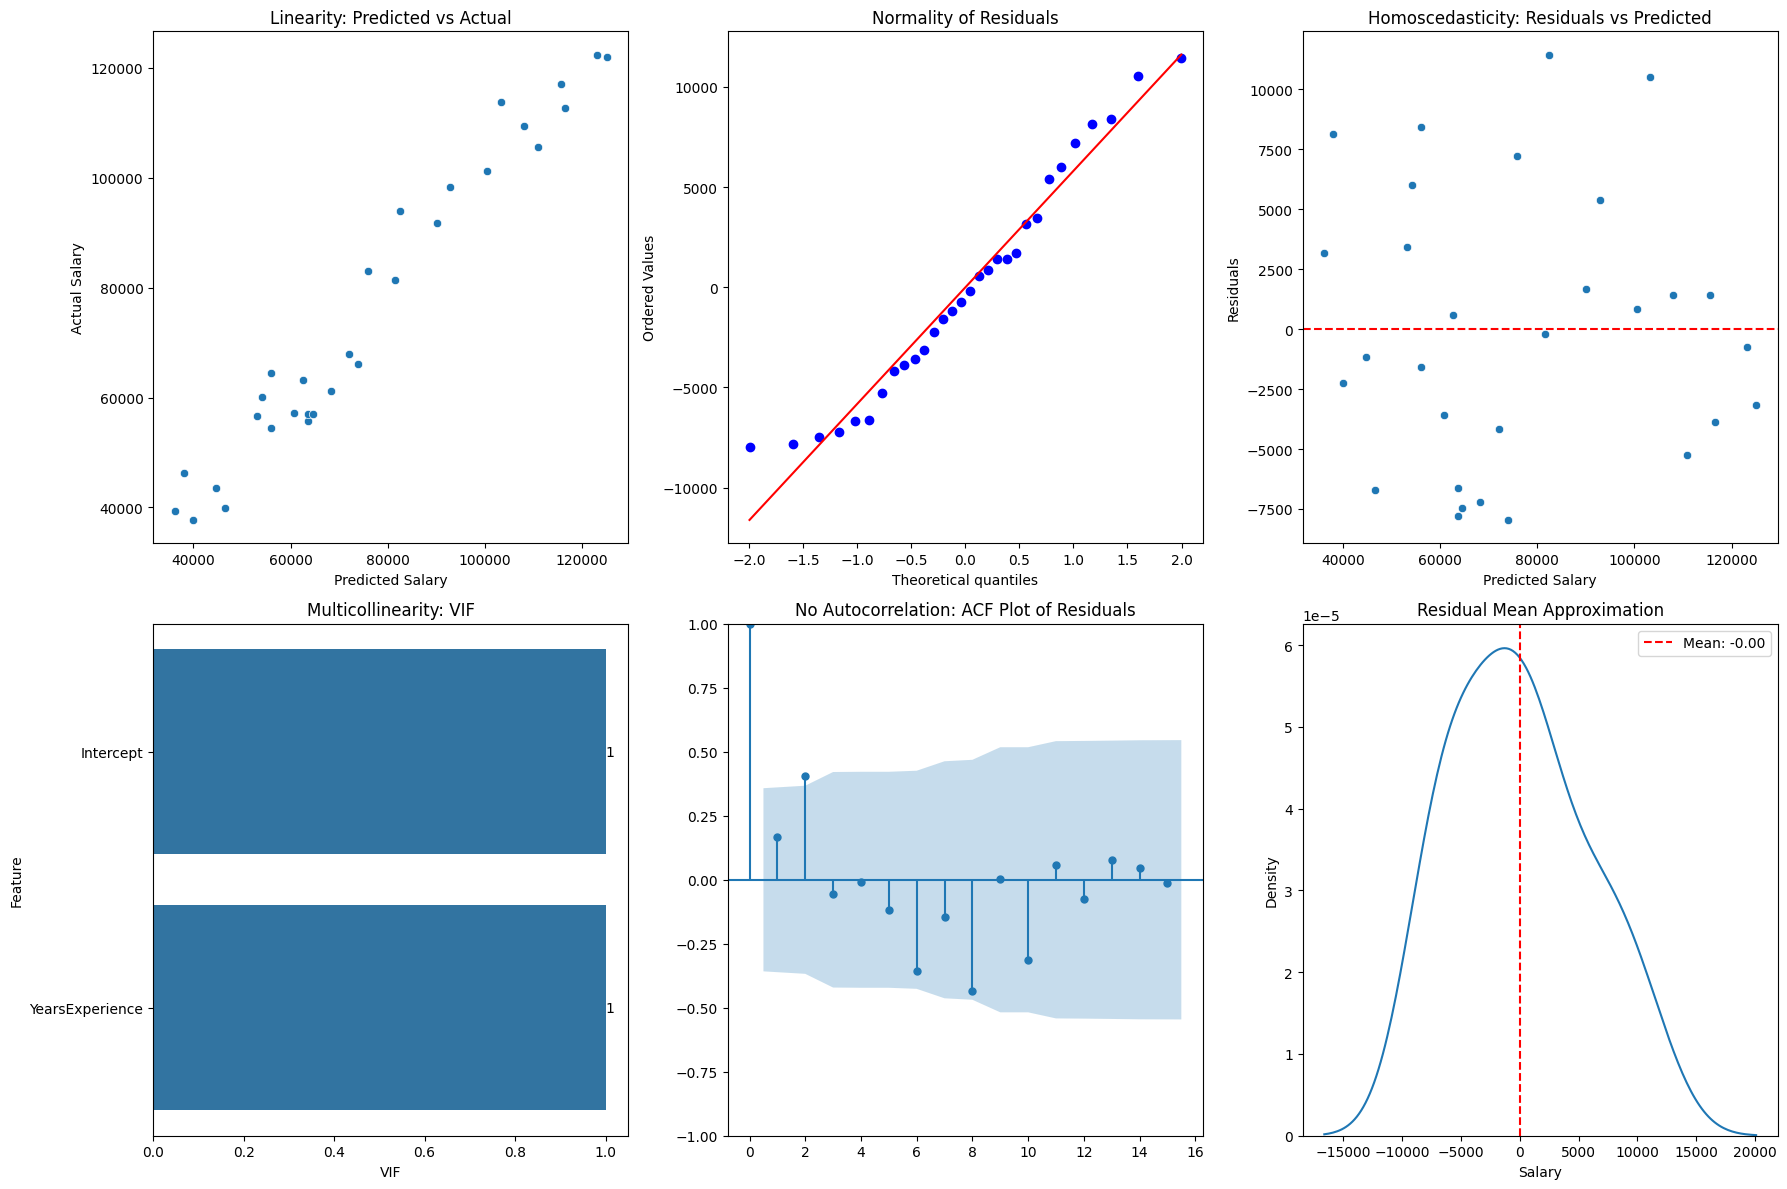

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import OLS, add_constant
from statsmodels.graphics.tsaplots import plot_acf
import scipy.stats as stats


# Separate independent and dependent variables
X = df.drop("Salary",axis=1)  # Independent variable
y = df['Salary']  # Dependent variable

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit linear regression model
lr = LinearRegression()
lr.fit(X_scaled, y)
y_pred = lr.predict(X_scaled)

# Calculate residuals
residuals = y - y_pred

# Create subplots (2x3 layout)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # 2 rows, 3 columns

# 1. Linearity: Scatterplot of predicted vs actual
sns.scatterplot(x=y_pred, y=y, ax=axes[0, 0])
axes[0, 0].set_title('Linearity: Predicted vs Actual')
axes[0, 0].set_xlabel('Predicted Salary')
axes[0, 0].set_ylabel('Actual Salary')

# 2. Normality of Residuals: Q-Q plot
stats.probplot(residuals, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Normality of Residuals')

# 3. Homoscedasticity: Residuals vs Predicted
sns.scatterplot(x=y_pred, y=residuals, ax=axes[0, 2])
axes[0, 2].axhline(0, color='red', linestyle='--')
axes[0, 2].set_title('Homoscedasticity: Residuals vs Predicted')
axes[0, 2].set_xlabel('Predicted Salary')
axes[0, 2].set_ylabel('Residuals')

# 4. Multicollinearity: VIF
X_vif = add_constant(X_scaled)
vif_data = pd.DataFrame()
vif_data['VIF'] = [variance_inflation_factor(X_vif, i) for i in range(X_vif.shape[1])]
vif_data['Feature'] = ['Intercept'] + X.columns.tolist()

sns.barplot(x='VIF', y='Feature', data=vif_data, ax=axes[1, 0])
axes[1, 0].set_title('Multicollinearity: VIF')
for i in axes[1, 0].containers:
    axes[1, 0].bar_label(i)

# 5. No Autocorrelation: ACF plot of residuals
plot_acf(residuals, ax=axes[1, 1])
axes[1, 1].set_title('No Autocorrelation: ACF Plot of Residuals')

# 6. Residual Mean Approximation: KDE plot of residuals
sns.kdeplot(residuals, ax=axes[1, 2])
mean_residuals = residuals.mean()
axes[1, 2].axvline(x=mean_residuals, color='red', linestyle='--', label=f'Mean: {mean_residuals:.2f}')
axes[1, 2].set_title('Residual Mean Approximation')
axes[1, 2].legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()